# Messung der Ausdehnung des Universums mit Galaxien


<img src="https://www.sdss.org/wp-content/uploads/2014/11/SDSS_telescope_new.jpg" width=500 />

Das Sloan Digital Sky Survey (SDSS) ist eine Durchmusterung des Himmels, die mit einem Teleskop und Instrumenten am Apache-Point-Observatorium in den USA durchgeführt wird. Dabei werden Bilder von Galaxien und anderen Himmelsobjekten bei verschiedenen Wellenlängen aufgenommen, und auch Spektra von einzelnen Objekten genommen. Aktuelle Informationen zur Durschmusterung gibt es hier (auf Englisch): https://www.sdss.org/. 
 
In diesem Tutorial benutzen wir uns Daten eines Teils der SDSS Durchmusterung, das [Baryon Oscillation Spectroscopic Survey](https://www.sdss.org/surveys/boss/) (BOSS) an. Die Daten kommen alle von einer sogenannte spektroskopischen Platte der Beobachtungen von einem Gebiet am Himmel. 

<img src="https://www.sdss.org/wp-content/uploads/2019/11/apogeen-plugging.png" width=300 />

Hier gibt es mehr Informationen zu den Platten (auf Englisch): [SDSS Plates](http://voyages.sdss.org/preflight/sdss-plates/)

Mit diesen Daten werden wir uns nun anschauen, wie  Georges Lemaître und Edmin Hubble in den 20ern des letzten Jahrhunderts auf die allgemeine Beziehung zwischen der Entfernung einer Galaxie von uns und der sogenannte Rotverschiebung einer Galaxie gekommen ist. Wir benutzen dafür die Programmiersprache Python, um die Daten vom Datenarchiv des SDSS herunterzuladen und selbst zu analysieren. 

## Übung 1: Unsere Galaxien


Wir benutzen die Platte Nummer 7045, die Daten (Galaxienbilder und Spektren) kann jeder auf der Webseite von SDSS einsehen und herunterladen. Um auf die Seite mit den Daten unserer Platte zu kommen, klick bitte hier: [plate browser](https://skyserver.sdss.org/dr12/en/tools/getimg/plate.aspx?choosesurvey=boss&P=299489402097264640&S=1868993899549190144&B=7931964954050619392&A=apogee.apo25m.c.r5.4812.55725)

Interessante Beispiele von 'näheren' und daher besser sichtbaren Galaxien sind die folgenden Galaxien. Um die Bilder aufzurufen, klicke bitte auf den kleinen Galaxien-Button links neben der Nummer auf der Webseite. \
[404] GALAXY z=0.019 (eine schöne Spiralgalaxie) \
[376] GALAXY z=0.102 (hier sind zum Teil zwei Galaxien im Bild) \
[048] GALAXY z=0.096 (eine eher sphärische / elliptische Galaxie)


Hier ist das Bild unserer Galaxie Nummer 404:

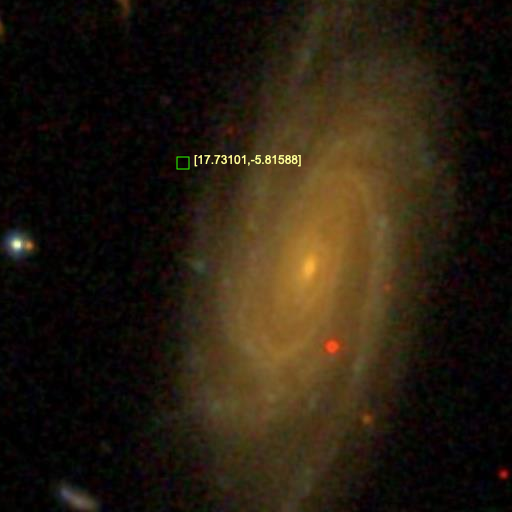

Wenn wir stattdessen auf die Nummer klicken, sehen wir das sogenannte Spektrum der Galaxie.

### Was ist ein Spektrum?

Für ein Spektrum wird Licht in Bestandteile verschiedener Wellenlänge aufgespalten, wie bei einem Regenbogen oder einem Prisma sichtbar. Dann wird die Stärke des jeweiligen Lichts, z.B. des roten, gemessen. Das Galaxienspektrum zeigt die Verteilung der Stärke in Abhängigkeit der Wellenlange, links sind kurze Wellenlängen (z.B. eher blaues Licht) und rechts im Spektrum längere (z.B. eher rotes Licht). 

<img src="https://www.sdss.org/wp-content/uploads/2014/11/faceplat2.jpg" width=200 />

Und hier ist das Spektrum der Galaxie Nummer 404:

<img src="https://skyserver.sdss.org/dr12/en/get/SpecById.ashx?id=7932076004725157888" width=700 />

### Was ist Rotverschiebung?

Hat man eine bestimmte Linie im Spektrum identifiziert, ist die Rotverschiebung definiert als die relative Verschiebung der gemessenen Wellenlänge $\lambda_z$ der Linie für die Galaxie im Vergleich zu der Wellenlänge $\lambda_0$ die man auf der Erde im Labor für die Linie misst:

$$z = \frac{\lambda_0 - \lambda_z}{\lambda_z}$$

Zum Beispiel für unsere Galaxie Nummer 404 ergab das eine Rotverschiebung von 0.476 aus dem Spektrum oben.

## Übung 2: Vorbereitung und Laden der Galaxien

Bitte klicke auf den folgenden Block mit Code, und klicke auf den 'Run' Knopf oben in der Leiste unseres Jupyter-Notebooks um den Code auszuführen. (Alternativ kann man auch die Tastenkombination Umschalt/Shift und return gleichzeitig drücken.) \
*** Vergiss nicht den Run Knopf für jeden einzelnen Code-Block mit 'In[]' vorne zu drücken, auch wenn du nichts geändert hast, sonst fehlt dem Programm etwas ***

In [6]:
# Importieren von Code-Paketen für Data Science
# Paket = enthält fertige Funktionen und Funktionalitäten, die man mit seinem Code dann aufrufen kann
import seaborn as sns
import pandas as pd
from scipy import stats

# Importiere NumPy, wichtig für Mathe-Funktionen
import numpy as np

# Matplotlib ist wichtig um Bilder zu erzeugen
import matplotlib.pyplot as plt
%matplotlib inline
print('Pakete wurden importiert')

Pakete wurden importiert


In [5]:
# Dieses Paket brauchen wir um Daten von der SDSS Datenbank herunterzuladen
!pip install astroquery

In [7]:
# Importiere weitere Pakete die wir für unser Astronomie-Projekt brauchen 
from astropy.table import Table
from astroquery.sdss import SDSS
print('Pakete wurden importiert')

Pakete wurden importiert


### Nummer und Datum unserer Platte

In [8]:
# Plate browser: https://skyserver.sdss.org/dr12/en/tools/getimg/plate.aspx
# Hier setzen wie die Nummer und das Datum der Aufnahme (MJD = Modifiziertes Julianisches Datum) unserer Platte ein
plate = 7045
mjd = 56577
print('Platte =', plate, "\nMJD =", mjd)

Platte = 7045 
MJD = 56577


Wir werden nun unsere Galaxiendaten laden, um uns anzuschauen, ob sie die Entdeckung einer Ausdehnung des Universums unterstützen. 

### Anfrage an die Datenbank

Für unsere Analyse brauchen wir die Galaxien im Datenset mit ihrer Information zu Rotverschiebung und Helligkeit (sogenannte 'apparent magnitude'). 

Wir laden daher von der Datenbank herunter:
* Object ID (Nummer bzw. ID der Galaxie)
* Right Ascension und Declination (Koordinaten am Himmel)
* Apparent Magnitude (Helligkeit)
* Redshift (Rotverschiebung)

Hier ist ein Beispiel für eine Anfrage an die Datenbank in der sogenannten Structured Query Language (SQL), mit dem wir die benötigten Informationen für *maximal* 1000 Objekte der Platte herunterladen:
<pre> SELECT TOP 1000 objid, ra, dec, modelMag_i AS app_mag , z
   from SpecPhoto WHERE (class = 'GALAXY' AND plate = '7045')</pre>
 
SpecPhoto meint hier eine Tabelle der SDSS Datenbank, die photometrische Informationen (Helligkeit) und spektroskopische Informationen (Rotverschiebung) gespeichert hat für unsere Galaxien. Wir nutzen als Maß für die Helligkeit die 'model magnitude' von nur einem Filter, dem 'i' Filter, von insgesamt 5 möglichen Filtern [`ugriz`](https://www.sdss.org/instruments/camera/#Filters) Filter begrenzen einen Wellenlängenbereich, über den für die Helligkeit gemessen wird. Wir ändern außerdem den Namen der Magnitude von 'modelMag_i' zu 'app_mag' zur Vereinfachung. Y steht für Rotverschiebung und ist für uns ein Maß der Entfernung. Zuletzt fragen wir nur die Objektklasse 'GALAXY' für Galaxien an. 

In [99]:
# Unsere Anfrage an die Datenbank für die Daten von maximal 1000 Galaxien
query = "SELECT TOP 1000 objid, ra, dec, modelMag_i AS app_mag , z from SpecPhoto WHERE (class = 'GALAXY' AND plate = '7045' AND z<0.9 AND z>0.05  )"

# Wir fragen die Daten an und speichern sie in 'result'
result = SDSS.query_sql(query, data_release=16)
print(result[0])

       objid            ra       dec    app_mag      z    
------------------- --------- --------- -------- ---------
1237679322854392239 19.082945 -5.113051 19.86292 0.4630635


#### Vereinfachte Tabelle

Hier übertragen wir die Daten aus 'result' einfach in eine Form, mit der unser Programm leichter rechnen kann. Wir nennen unsere Daten jetzt 'data'.

In [100]:
# Übertragung der AstroPy Daten 'result' in sogenannte pandas Daten
data = result.to_pandas()

# Beispiel der ersten 5 Zeilen
data.head()

,objid,ra,dec,app_mag,z
0,1237679322854392239,19.082945,-5.113051,19.86292,0.463064
1,1237679254127968636,19.233235,-4.993492,20.13133,0.481199
2,1237679323391262832,19.079193,-4.785222,19.35048,0.486156
3,1237679254127903503,19.158240,-5.016556,19.54707,0.500940
4,1237679254127903239,19.134987,-4.961951,18.89001,0.449238


## Übung 3: Was sagen uns Helligkeit und Rotverschiebung  der Galaxien

### Frage 1
**Doppelklicke hier zum Antworten. Wie erwartest du, hängt die gemessene Helligkeit einer Galaxie von ihrer Entfernung ab? (Hinweis: [Was ist das Abstandsgesetz bei Licht?](https://de.wikipedia.org/wiki/Abstandsgesetz)**

Antwort:

### Graph von Helligkeit und Rotverschiebung unserer Galaxien

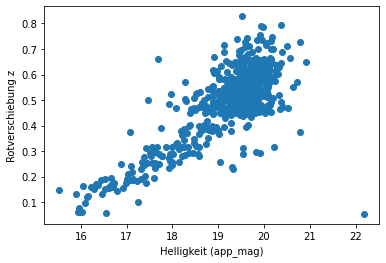

In [101]:
# Jeder Punkt im Plot repräsentiert die Messpunkte einer Galaxie

x = data['app_mag'] # Vektor der Helligkeiten
y = data['z'] # Vektor der Rotverschiebungen

# Hier sagen wir dem Programm, dass es einen Plot zu erzeugen soll
plt.scatter(x,y)

# Achsenbeschriftung
plt.xlabel('Helligkeit (app_mag)')
plt.ylabel('Rotverschiebung z')

# Der Plot wird gezeigt
plt.show()

### Frage 2
**Was fällt dir im Plot auf, was findest du merkwürdig? Kann man sich eine gerade Linie durch die Punkte denken? Welche Punkte fallen auf?**


### Rotverschiebung als Geschwindigkeit

Wie wir aus Übung 1 wissen, ist die Rotverschiebung eine Verschiebung der Wellenlängen im Spektrum der Galaxien. Einen ähnlichen Effekt kennen wir auf der Erde vom Doppler-Effekt - beispielsweise das Horn eines Krankenwagens der sich schnell von uns wegbewegt klingt tiefer, das bedeutet die Wellenlänge des Geräuschs wird länger, also 'roter'. Für nicht zu große Rotverschiebungen gilt ein ähnlicher Effekt auch für Galaxien im Universum. Das bedeutet, dass wir die Rotverschiebung z mit der Geschwindigkeit v verbinden können:

$$v = c z$$

Die Konstante c ist die Geschwindigkeit von Licht selbst. Sie beträgt ca. 300 000 km/s. 

Unten links seht ihr Edwin Hubble's Graphen von 1929, der zeigt, dass sich das Universum in der Tat ausdehnt! Genauer, die Rotverschiebung bzw. Geschwindigkeit der Galaxien hängt von ihrer Entfernung zu uns ab. 

<img src="https://openstax.org/resources/7f27f064e23d86aa9968b4ef8642cbe37194697e" width=75% />


### Frage 3
**Doppelklicke hier zum Antworten. In deinen eigenen Worten, was bedeutet Rotverschiebung für eine Galaxie? Wie hängt Rotverschiebung mit Geschwindigkeit zusammen?** 

Antwort:

## Übung 4: Geschwindigkeit und Lineare Relation 

Hier übertragen wir Rotverschiebung in Geschwindigkeit und plotten nochmals die Daten. Wir fitten eine Gerade durch die Datenpunkte, um zu sehen, ob unser Programm eine lineare relation zwischen Geschwindigkeit und Entfernung finden kann. 

In [106]:
# Zuerst berechnen wir die Geschwindigkeiten

# Geschwindigkeit von Licht
from astropy import constants as const
c = const.c.to('km/s')
print('Lichtgeschwindigkeit',c)

# Von Rotverschiebung zu Geschwindigkeit der Galaxien
v = c*data['z']
print('Geschwindigkeit einer Galaxie in km/s', v[0])

Lichtgeschwindigkeit 299792.458 km / s
Geschwindigkeit einer Galaxie in km/s 138822.944875083


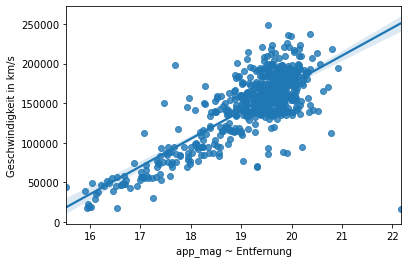

In [107]:
# Jetzt plotten wir Geschwindikeit gegen Helligkeit (Entfernung)
x = data['app_mag']
y = v

# Das Programm soll eine Gerade fitten
fit = sns.regplot(x,y)

# Achsenbeschriftung
fit.set_xlabel('app_mag ~ Entfernung')
fit.set_ylabel('Geschwindigkeit in km/s')

# Der Plot wird gezeigt
plt.show()

### Glückwunsch! Du hast gerade gemessen, dass sich das Universum ausdehnt. Die Steigung der Geraden ist ein Maß dafür wie schnell.

### Finale Frage 4
**Doppelklicke hier zum Antworten. Was fällt dir im neuen Plot auf? Gibt es eine lineare Relation zwischen Geschwindigkeit und Helligkeit bzw. Entfernung? Was bedeutet der hellblaue Bereich um die Gerade?**

Antwort:
